# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Mohammad Ikhwanud Dawam
- **Email:** d4w4m123@gmail.com
- **ID Dicoding:** ikhwanud_dawam

## Menentukan Pertanyaan Bisnis

- Jam berapa polusi udara cenderung paling tinggi dan paling rendah?
- Lokasi mana yang memiliki kualitas udara paling buruk dan paling baik dalam 5 tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

## Data Wrangling

### Gathering Data

In [3]:
!git clone https://github.com/marceloreis/HTI.git

Cloning into 'HTI'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 11), reused 24 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 10.22 MiB | 15.74 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [4]:
# Combine all dataset
folder_path = "/content/HTI/PRSA_Data_20130301-20170228/*.csv"
csv_files = glob.glob(folder_path)

def extract_station_name(filename):
    base_name = os.path.basename(filename)
    parts = base_name.replace(".csv", "").split("_")
    return parts[2]

df_list = [pd.read_csv(file).assign(station=extract_station_name(file)) for file in csv_files]
df_final = pd.concat(df_list, ignore_index=True)

df_final.to_csv("combined_air_quality.csv", index=False)

df_final.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**Insight:**
- Terdapat 12 csv yang masing-masing menampung data polusi di 12 stasiun berbeda
- Terdapat 18 kolom dalam dataset

### Assessing Data

In [5]:
df = pd.read_csv("/content/combined_air_quality.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [7]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [8]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [9]:
df.duplicated().sum()

0

**Insight:**
- Terdapat data null pada beberapa fitur
- dtypes: float64 sebanyak 11 fitur, int64 sebanyak 5 fitur, object sebanyak 2 fitur

### Feature Engginering

Menggabungkan fitur year, month, day, dan hour untuk membuat fitur baru dengan nama date

In [13]:
df["date"] = pd.to_datetime(df[["year", "month", "day", "hour"]].astype(str).agg('-'.join, axis=1), format="%Y-%m-%d-%H")

### Cleaning Data

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


### Data Normalization

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Select the column to be used for analysis
columns_to_normalize = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]

# Data normalization using MinMaxScaler
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Added a new column with the average of all normalized parameters
df["combined_pollution"] = df[columns_to_normalize].mean(axis=1)

**Insight:**
- Data bebas dari null
- Normalisasi fitur polusi seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM agar data konsisten

## Exploratory Data Analysis (EDA)

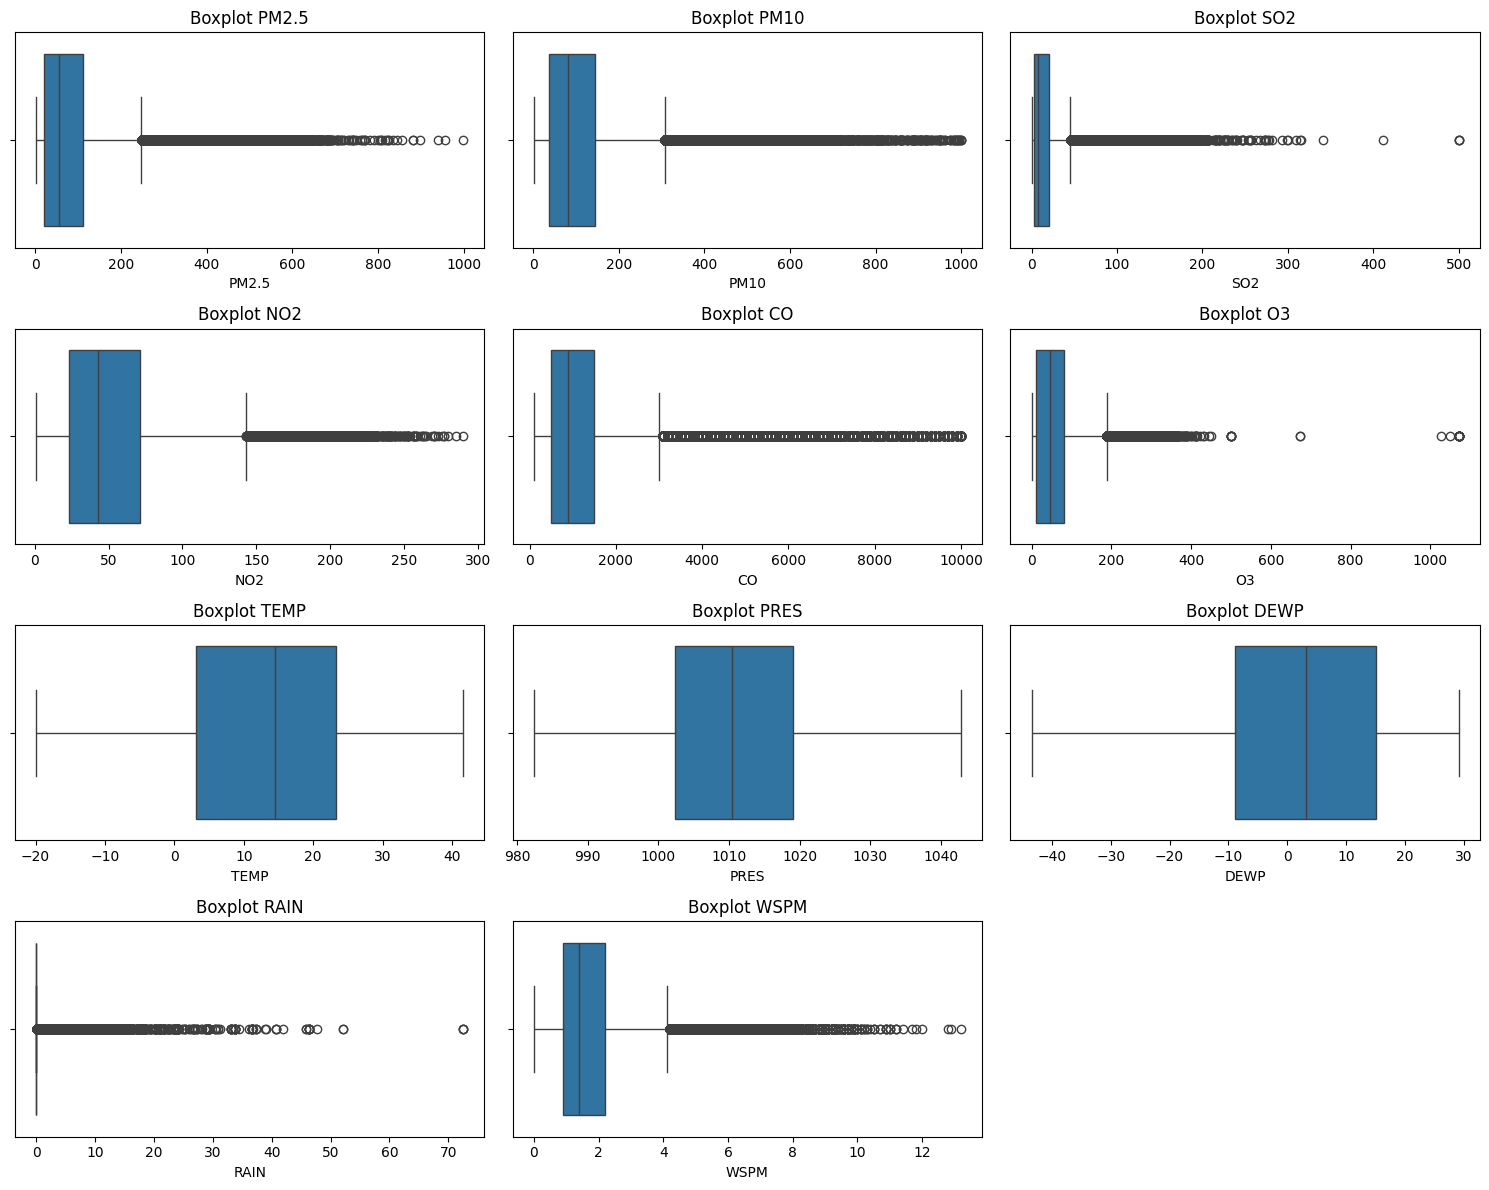

In [10]:
selected_features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(selected_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot {col}")

# Delete subplot if total features < 12
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
def count_outliers_iqr(df, columns):
    outlier_counts = {}
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    return outlier_counts

outlier_counts = count_outliers_iqr(df, selected_features)

print("Total outliers per feature:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outlier")

Total outliers per feature:
PM2.5: 19142 outlier
PM10: 14658 outlier
SO2: 35566 outlier
NO2: 7021 outlier
CO: 28054 outlier
O3: 16599 outlier
TEMP: 0 outlier
PRES: 0 outlier
DEWP: 0 outlier
RAIN: 16520 outlier
WSPM: 23079 outlier


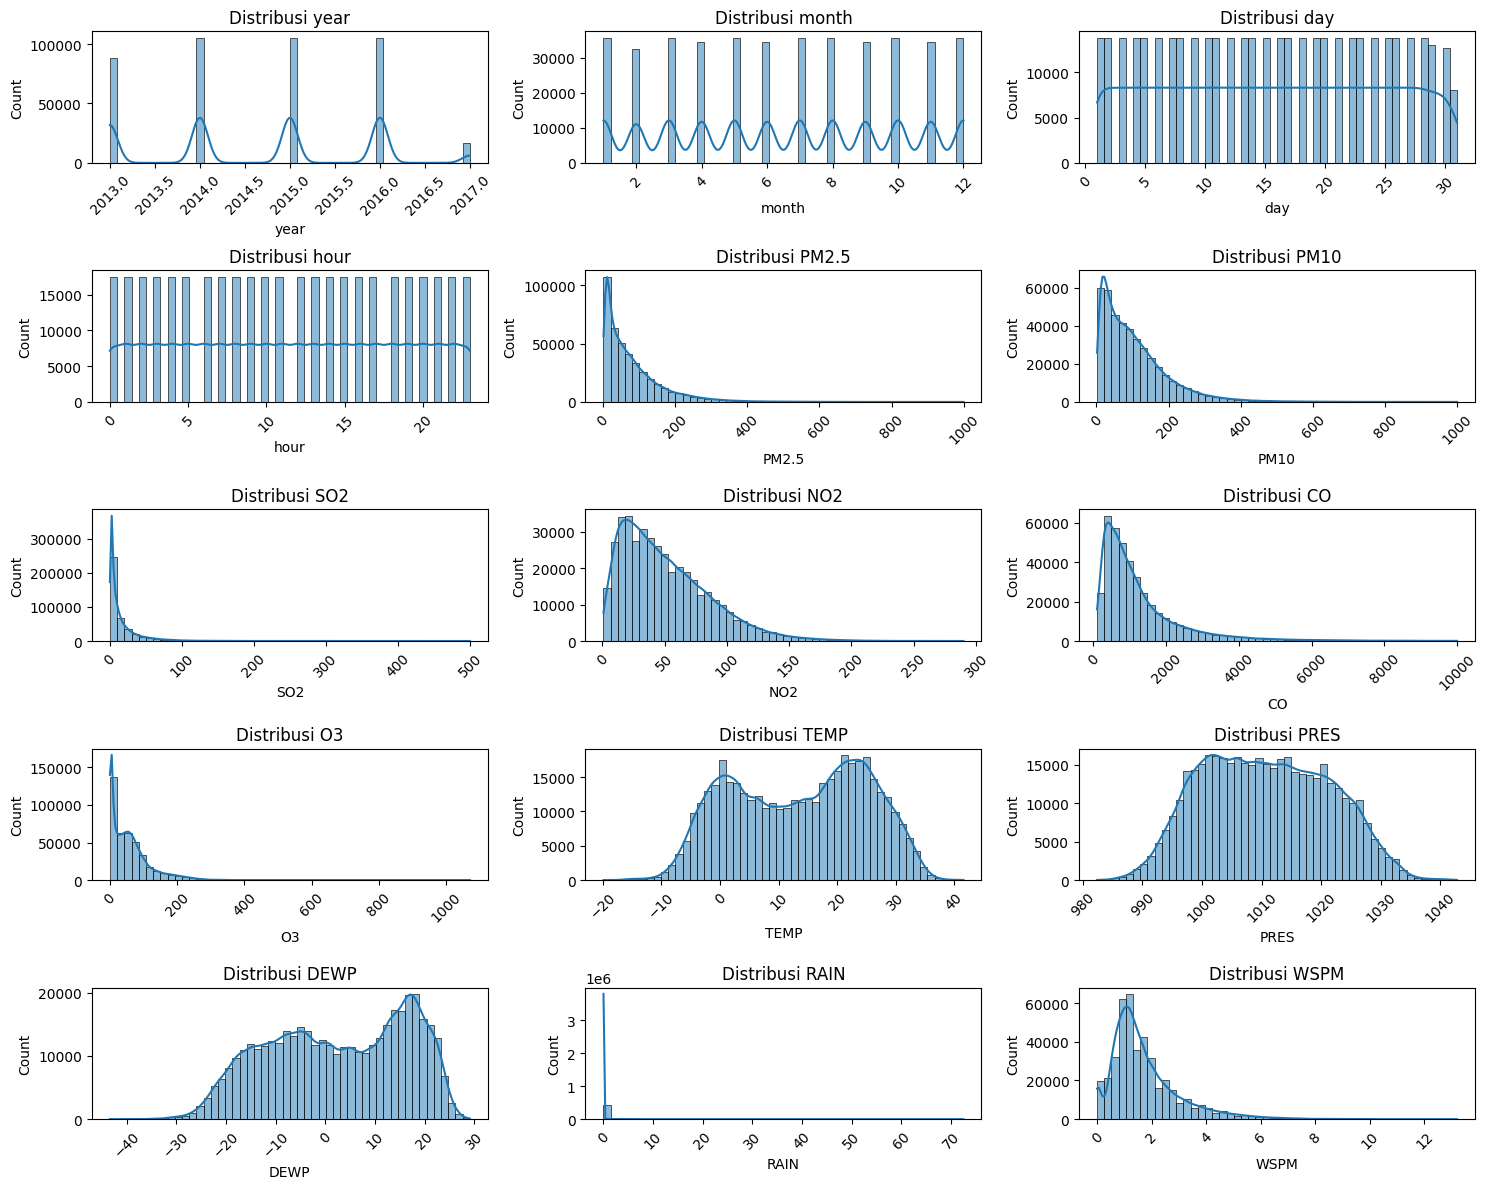

In [12]:
selected_features = ['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(selected_features):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribusi {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight:**
- Terdapat beberapa data yang mempunyai outlier
- Left-skewed pada fitur polusi seperti PM2.5, PM10, SO2, NO2, CO, O3

## Visualization & Explanatory Analysis

### Pertanyaan 1: Jam berapa polusi udara cenderung paling tinggi dan paling rendah?

In [17]:
# Calculating the combined average per hour
combined_by_hour = df.groupby("hour")["combined_pollution"].mean()

# Hours with highest and lowest combined pollution average
highest_combined_hour = combined_by_hour.idxmax()
lowest_combined_hour = combined_by_hour.idxmin()

print("Jam dengan rata-rata polusi tertinggi:", highest_combined_hour)
print("Jam dengan rata-rata polusi terendah:", lowest_combined_hour)

Jam dengan rata-rata polusi tertinggi: 12
Jam dengan rata-rata polusi terendah: 5


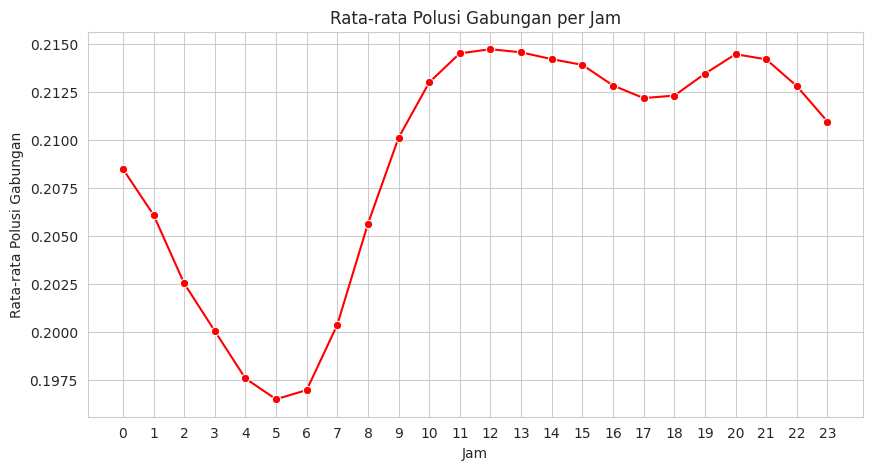

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Visualization of hourly average combined pollution
plt.figure(figsize=(10, 5))
sns.lineplot(x=combined_by_hour.index, y=combined_by_hour.values, marker="o", color="red")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Polusi Gabungan")
plt.title("Rata-rata Polusi Gabungan per Jam")
plt.xticks(range(0, 24))
plt.show()

### Pertanyaan 2: Lokasi mana yang memiliki kualitas udara paling buruk dan paling baik dalam 5 tahun terakhir?

In [18]:
# Calculating the combined average per location (station)
combined_by_station = df.groupby("station")["combined_pollution"].mean()

# Locations with highest and lowest combined pollution
worst_combined_location = combined_by_station.idxmax()
best_combined_location = combined_by_station.idxmin()

print("Station dengan rata-rata polusi gabungan tertinggi:", worst_combined_location)
print("Station dengan rata-rata polusi gabungan terendah:", best_combined_location)

Station dengan rata-rata polusi gabungan tertinggi: Nongzhanguan
Station dengan rata-rata polusi gabungan terendah: Dingling


<ipython-input-20-8d20679a85f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sorted_stations.index, x=sorted_stations.values, palette="coolwarm")


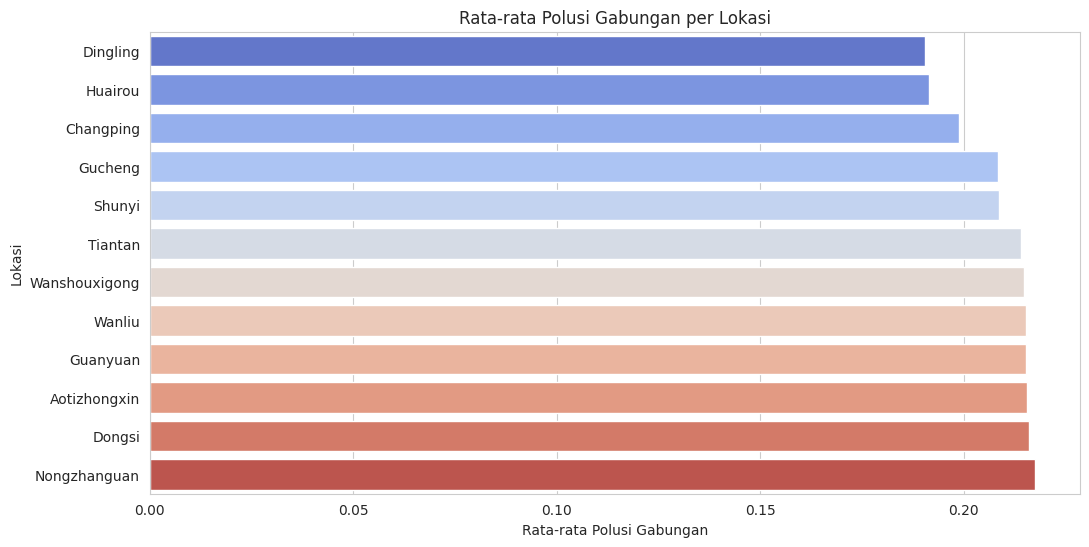

In [20]:
# Visualisasi rata-rata polusi gabungan per lokasi (Top 10 & Bottom 10)
plt.figure(figsize=(12, 6))
sorted_stations = combined_by_station.sort_values()
sns.barplot(y=sorted_stations.index, x=sorted_stations.values, palette="coolwarm")
plt.xlabel("Rata-rata Polusi Gabungan")
plt.ylabel("Lokasi")
plt.title("Rata-rata Polusi Gabungan per Lokasi")
plt.show()

**Insight:**
- Pada jam 0-5 polusi di udara cenderung menurun, kemudian jam 6-12 naik kembali
- Ada keunikan pada jam 18-20 malam, karena tingkat polusi tiba-tiba naik yang mana sebelumnya mulai turun
- Daerah Nongzhanguan, Dongsi, dan Aotizhongxin merupakan top 3 dengan polusi tinggi, kemudian Dingling, Huaitou, dan Changping merupakan top 3 dengan polusi rendah

## Analisis Lanjutan (Opsional)

In [21]:
# Menentukan batas binning berdasarkan kuartil
bins = [combined_by_station.min(), combined_by_station.quantile(0.33), combined_by_station.quantile(0.66), combined_by_station.max()]
labels = ["Baik", "Sedang", "Buruk"]

# Mengelompokkan lokasi berdasarkan kategori polusi
df["pollution_category"] = pd.cut(df["combined_pollution"], bins=bins, labels=labels, include_lowest=True)

# Menghitung jumlah lokasi dalam setiap kategori
category_counts = df.groupby("station")["pollution_category"].first().value_counts()
category_counts

,count
pollution_category,
Baik,11
Sedang,1
Buruk,0


In [22]:
df.to_csv("all_clean_data.csv", index=False)

## Conclusion

**Conclution pertanyaan 1:**
- Rata-rata polusi gabungan tertinggi terjadi pada jam 12 siang dan terendah pada jam 5 pagi

**Conclution pertanyaan 2:**
- Rata-rata polusi gabungan tertinggi menurut lokasinya ada di  Nongzhanguan dan terendah ada di Dingling